In [1]:
import sys
import time
import os
import glob
from time import sleep
import datetime
import pytz
import argparse

import numpy as np
import pandas as pd
import pickle
import joblib

import scipy
import sklearn
from sklearn.metrics import accuracy_score, classification_report

from scipy.stats import skew, kurtosis
#from Current_Feature_Extractor import Extract_Time_Features, Extract_Phase_Features, Extract_Freq_Features

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/데이터/2.2kW_cur_L-DSF-01_training_with_label.csv')

In [4]:
data = data.drop(['Date'], axis = 1)
data = data.drop(['WATT'], axis = 1)

In [5]:
data

,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,R_RMS,S_RMS,T_RMS,R_Skewness,S_Skewness,T_Skewness,R_Kurtosis,S_Kurtosis,T_Kurtosis,R_Crest,S_Crest,T_Crest,R_Shape,S_Shape,T_Shape,R_Impulse,S_Impulse,T_Impulse,RS_phase,ST_phase,TR_phase,RS_Level,ST_Level,TR_Level,R_1x,S_1x,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x,LABEL
0,3.403320,3.123047,4.043945,2.057587,1.889543,2.245951,6.726562,6.166016,7.607422,2.296682,2.139533,2.517410,-0.008619,0.005243,0.002177,1.488438,1.532018,1.525592,2.928818,2.881944,3.021924,1.116201,1.132302,1.120866,1.654034,1.652805,1.800549,-3.141593,-3.141593,3.141593,0.243998,2.096300,-2.340298,0.012755,0.012735,0.014614,3.282771,3.058104,3.579351,0.022117,0.019693,0.023455,0.031669,0.027953,0.024256,0
1,3.283203,3.083008,4.003906,2.059709,1.883498,2.254960,6.526367,6.005859,7.487305,2.287841,2.122786,2.519664,-0.001778,-0.012131,0.006546,1.473315,1.520033,1.518037,2.852631,2.829234,2.971549,1.110759,1.127045,1.117387,1.594013,1.636853,1.775600,-3.141593,-3.141593,3.141593,0.319912,1.978385,-2.298297,0.013199,0.011972,0.015374,3.433224,3.183656,3.761500,0.013864,0.011091,0.014099,0.030992,0.039196,0.035626,0
2,3.283203,3.083008,3.963867,2.059209,1.884539,2.255280,6.526367,6.085938,7.407227,2.288444,2.123103,2.519079,-0.005667,0.008417,0.002326,1.475197,1.520606,1.516633,2.851880,2.866529,2.940450,1.111322,1.126591,1.116969,1.594400,1.635948,1.757594,-3.141593,-3.141593,3.141593,0.200456,2.059184,-2.259640,0.017959,0.015813,0.019783,3.432319,3.184894,3.755824,0.022333,0.019714,0.020837,0.024400,0.026358,0.023356,0
3,3.283203,3.123047,3.963867,2.065936,1.881936,2.254640,6.526367,6.085938,7.407227,2.295448,2.121559,2.518639,-0.000307,-0.007458,0.005278,1.475026,1.519842,1.515321,2.843178,2.868616,2.940964,1.111094,1.127328,1.117091,1.589209,1.659486,1.758093,-3.141593,-3.141593,-3.141593,0.242096,2.017423,-2.259520,0.016631,0.018814,0.021853,3.448775,3.188166,3.774974,0.020763,0.018589,0.020160,0.021301,0.024387,0.022983,0
4,3.363281,3.163086,3.963867,2.063974,1.901255,2.222268,6.686523,6.206055,7.407227,2.293941,2.139448,2.481010,-0.005117,0.001192,0.003555,1.480373,1.515924,1.510737,2.914863,2.900773,2.985569,1.111420,1.125282,1.116431,1.629518,1.663683,1.783703,-3.141593,3.141593,3.141593,0.242396,2.098883,-2.341279,0.010677,0.011181,0.010843,3.317691,3.091339,3.568165,0.012395,0.012090,0.013433,0.016602,0.018446,0.015287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,3.363281,3.163086,4.003906,2.084033,1.875850,2.275960,6.686523,6.166016,7.527344,2.334815,2.118784,2.558860,0.004386,-0.008357,-0.001355,1.486788,1.512225,1.522238,2.863835,2.910167,2.941678,1.120335,1.129506,1.124299,1.613833,1.686215,1.759216,-3.141593,3.141593,-3.141593,0.278732,2.059625,-2.338356,0.012074,0.005189,0.007708,3.407100,3.087204,3.727322,0.052801,0.051043,0.052604,0.072128,0.065349,0.071531,3
36764,3.363281,3.163086,4.043945,2.093102,1.889503,2.289674,6.686523,6.286133,7.607422,2.346897,2.133558,2.575513,-0.008000,0.004851,0.004596,1.487995,1.511570,1.522866,2.849092,2.946315,2.953751,1.121253,1.129163,1.124838,1.606841,1.674030,1.766167,-3.141593,3.141593,-3.141593,0.158154,2.179862,-2.338016,0.010459,0.009439,0.014726,3.442630,3.130037,3.764798,0.022162,0.021225,0.021776,0.023548,0.023365,0.023047,3
36765,3.363281,3.163086,4.043945,2.088117,1.887081,2.282687,6.686523,6.206055,7.527344,2.339909,2.131453,2.566823,0.004879,-0.008837,-0.000606,1.486954,1.511784,1.522252,2.857600,2.911654,2.932553,1.120583,1.129498,1.124474,1.610676,1.676179,1.771572,-3.141593,3.141593,-3.141593,0.239594,2.098643,-2.338236,0.014099,0.009980,0.009954,3.442938,3.132089,3.758024,0.048946,0.045703,0.047815,0.075257,0.066345,0.073342,3
36766,3.363281,3.203125,4.043945,2.083112,1.875770,2.266111,6.686523,6.246094,7.567383,2.341179,2.121183,2.554167,-0.005014,-0.001651,

In [6]:
data2 = data.corr()

In [7]:
data2

,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,R_RMS,S_RMS,T_RMS,R_Skewness,S_Skewness,T_Skewness,R_Kurtosis,S_Kurtosis,T_Kurtosis,R_Crest,S_Crest,T_Crest,R_Shape,S_Shape,T_Shape,R_Impulse,S_Impulse,T_Impulse,RS_phase,ST_phase,TR_phase,RS_Level,ST_Level,TR_Level,R_1x,S_1x,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x,LABEL
R_AbsMax,1.000000,0.976039,0.951810,0.595678,0.590620,0.560857,0.986013,0.979231,0.880473,0.656366,0.652829,0.607402,-0.210447,0.595107,0.038512,-0.229926,0.097320,-0.120938,-0.244095,0.111976,0.140463,-0.067385,-0.006884,0.062955,-0.058245,0.259941,0.006300,-0.013754,0.012482,-0.002931,-0.555717,0.978151,-0.926714,0.622119,0.534357,0.661138,0.284837,0.283625,0.270297,0.389041,0.405073,0.316112,0.193779,0.208885,0.146508,0.151402
S_AbsMax,0.976039,1.000000,0.944998,0.557187,0.567891,0.533517,0.955159,0.992243,0.858993,0.621417,0.633706,0.584699,-0.212088,0.565016,0.051174,-0.207324,0.123046,-0.098733,-0.224512,0.147746,0.145573,-0.043319,0.031191,0.077824,-0.040245,0.300372,0.020823,0.007321,0.014098,-0.000927,-0.640362,0.986538,-0.886931,0.637152,0.547956,0.682490,0.271015,0.277088,0.261770,0.396442,0.415429,0.320316,0.190434,0.209180,0.143383,0.140357
T_AbsMax,0.951810,0.944998,1.000000,0.667154,0.658479,0.683214,0.952813,0.955553,0.954192,0.727794,0.725426,0.733006,-0.196572,0.634381,0.023362,-0.275913,0.051560,-0.164511,-0.313099,0.020820,0.100899,-0.108240,-0.060157,0.040668,-0.095658,0.188795,-0.023914,0.034731,0.012872,-0.000219,-0.522290,0.949830,-0.910241,0.564175,0.481698,0.602322,0.329955,0.329415,0.339922,0.344419,0.358639,0.281676,0.185279,0.198350,0.145601,0.242925
R_AbsMean,0.595678,0.557187,0.667154,1.000000,0.987461,0.974858,0.707547,0.626479,0.833828,0.993344,0.982220,0.963293,-0.086620,0.758584,-0.238477,-0.459105,-0.339929,-0.370937,-0.590222,-0.530231,-0.047044,-0.380367,-0.564555,-0.100137,-0.305223,-0.427835,-0.156363,-0.045258,0.018604,-0.010408,0.126196,0.575089,-0.815470,0.042617,0.039109,0.020094,0.493320,0.488791,0.487994,0.031974,0.027373,0.044086,0.074317,0.068978,0.082227,0.366145
S_AbsMean,0.590620,0.567891,0.658479,0.987461,1.000000,0.962475,0.701358,0.636555,0.826340,0.977272,0.992591,0.948764,-0.079605,0.758065,-0.247316,-0.446052,-0.331205,-0.352131,-0.582844,-0.536011,-0.024111,-0.378961,-0.570063,-0.088984,-0.302536,-0.430011,-0.143075,-0.018004,0.020922,-0.010402,0.096772,0.583606,-0.808849,0.042810,0.042019,0.020828,0.484093,0.491775,0.480110,0.033976,0.030720,0.046690,0.075727,0.070231,0.083155,0.317210
T_AbsMean,0.560857,0.533517,0.683214,0.974858,0.962475,1.000000,0.667867,0.602308,0.848339,0.972359,0.964814,0.994589,-0.077627,0.725397,-0.187602,-0.472841,-0.334602,-0.397248,-0.587216,-0.512091,-0.107196,-0.370757,-0.524156,-0.126572,-0.303960,-0.405502,-0.187152,0.000854,0.016931,-0.007215,0.094259,0.553799,-0.768989,0.032553,0.027071,0.015821,0.484260,0.481748,0.500837,0.019666,0.014894,0.033541,0.076537,0.070728,0.085275,0.400825
R_P2P,0.986013,0.955159,0.952813,0.707547,0.701358,0.667867,1.000000,0.972371,0.926145,0.757719,0.753046,0.704737,-0.199636,0.664772,-0.009118,-0.290483,0.014067,-0.184709,-0.319961,0.002702,0.112095,-0.134708,-0.120596,0.026636,-0.111334,0.137050,-0.032772,-0.020091,0.012345,-0.004608,-0.437311,0.960169,-0.974322,0.547076,0.472318,0.574410,0.338832,0.337275,0.323093,0.346177,0.358427,0.286073,0.182938,0.194735,0.144553,0.179566
S_P2P,0.979231,0.992243,0.955553,0.626479,0.636555,0.602308,0.972371,1.000000,0.895243,0.686242,0.697677,0.649293,-0.207578,0.611220,0.034726,-0.245869,0.077858,-0.142073,-0.271437,0.092537,0.119271,-0.081745,-0.029836,0.050357,-0.071160,0.234175,-0.009643,0.003396,0.014640,-0.001860,-0.601599,0.994256,-0.920025,0.599907,0.517691,0.639580,0.305746,0.311667,0.296597,0.375616,0.392486,0.306340,0.190567,0.205146,0.145384,0.161350
T_P2P,0.880473,0.858993,0.954192,0.833828,0.826340,0.848339,0.926145,0.895243,1.000000,0.873079,0.872607,0.879801,-0.173048,0.727268,-0.080332,-0.359237,-0.

In [8]:
# RMS(R,S,T)를 기준으로 정상과 고장을 판단하므로, 상관관계 분석을 통해서 RMS 3상과 높은 상관관계를 보이는 변수들은 독립적이지 않다고 판단하여 제거
# T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,T_P2P,S_Skewness,TR_Level (상관관계가 3상과 모두 0.7이상이라 제거)
data3 = data
data3 = data3.drop(["T_AbsMax","R_AbsMean","S_AbsMean","T_AbsMean","R_P2P","T_P2P","S_Skewness","TR_Level"],axis=1)

In [10]:
data3

,R_AbsMax,S_AbsMax,S_P2P,R_RMS,S_RMS,T_RMS,R_Skewness,T_Skewness,R_Kurtosis,S_Kurtosis,T_Kurtosis,R_Crest,S_Crest,T_Crest,R_Shape,S_Shape,T_Shape,R_Impulse,S_Impulse,T_Impulse,RS_phase,ST_phase,TR_phase,RS_Level,ST_Level,R_1x,S_1x,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x,LABEL
0,3.403320,3.123047,6.166016,2.296682,2.139533,2.517410,-0.008619,0.002177,1.488438,1.532018,1.525592,2.928818,2.881944,3.021924,1.116201,1.132302,1.120866,1.654034,1.652805,1.800549,-3.141593,-3.141593,3.141593,0.243998,2.096300,0.012755,0.012735,0.014614,3.282771,3.058104,3.579351,0.022117,0.019693,0.023455,0.031669,0.027953,0.024256,0
1,3.283203,3.083008,6.005859,2.287841,2.122786,2.519664,-0.001778,0.006546,1.473315,1.520033,1.518037,2.852631,2.829234,2.971549,1.110759,1.127045,1.117387,1.594013,1.636853,1.775600,-3.141593,-3.141593,3.141593,0.319912,1.978385,0.013199,0.011972,0.015374,3.433224,3.183656,3.761500,0.013864,0.011091,0.014099,0.030992,0.039196,0.035626,0
2,3.283203,3.083008,6.085938,2.288444,2.123103,2.519079,-0.005667,0.002326,1.475197,1.520606,1.516633,2.851880,2.866529,2.940450,1.111322,1.126591,1.116969,1.594400,1.635948,1.757594,-3.141593,-3.141593,3.141593,0.200456,2.059184,0.017959,0.015813,0.019783,3.432319,3.184894,3.755824,0.022333,0.019714,0.020837,0.024400,0.026358,0.023356,0
3,3.283203,3.123047,6.085938,2.295448,2.121559,2.518639,-0.000307,0.005278,1.475026,1.519842,1.515321,2.843178,2.868616,2.940964,1.111094,1.127328,1.117091,1.589209,1.659486,1.758093,-3.141593,-3.141593,-3.141593,0.242096,2.017423,0.016631,0.018814,0.021853,3.448775,3.188166,3.774974,0.020763,0.018589,0.020160,0.021301,0.024387,0.022983,0
4,3.363281,3.163086,6.206055,2.293941,2.139448,2.481010,-0.005117,0.003555,1.480373,1.515924,1.510737,2.914863,2.900773,2.985569,1.111420,1.125282,1.116431,1.629518,1.663683,1.783703,-3.141593,3.141593,3.141593,0.242396,2.098883,0.010677,0.011181,0.010843,3.317691,3.091339,3.568165,0.012395,0.012090,0.013433,0.016602,0.018446,0.015287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,3.363281,3.163086,6.166016,2.334815,2.118784,2.558860,0.004386,-0.001355,1.486788,1.512225,1.522238,2.863835,2.910167,2.941678,1.120335,1.129506,1.124299,1.613833,1.686215,1.759216,-3.141593,3.141593,-3.141593,0.278732,2.059625,0.012074,0.005189,0.007708,3.407100,3.087204,3.727322,0.052801,0.051043,0.052604,0.072128,0.065349,0.071531,3
36764,3.363281,3.163086,6.286133,2.346897,2.133558,2.575513,-0.008000,0.004596,1.487995,1.511570,1.522866,2.849092,2.946315,2.953751,1.121253,1.129163,1.124838,1.606841,1.674030,1.766167,-3.141593,3.141593,-3.141593,0.158154,2.179862,0.010459,0.009439,0.014726,3.442630,3.130037,3.764798,0.022162,0.021225,0.021776,0.023548,0.023365,0.023047,3
36765,3.363281,3.163086,6.206055,2.339909,2.131453,2.566823,0.004879,-0.000606,1.486954,1.511784,1.522252,2.857600,2.911654,2.932553,1.120583,1.129498,1.124474,1.610676,1.676179,1.771572,-3.141593,3.141593,-3.141593,0.239594,2.098643,0.014099,0.009980,0.009954,3.442938,3.132089,3.758024,0.048946,0.045703,0.047815,0.075257,0.066345,0.073342,3
36766,3.363281,3.203125,6.246094,2.341179,2.121183,2.554167,-0.005014,0.007388,1.495946,1.521790,1.532616,2.856050,2.944627,2.962759,1.123885,1.130833,1.127115,1.614546,1.707632,1.784531,-3.141593,3.141593,3.141593,0.235970,2.100705,0.009887,0.009746,0.011754,3.497469,3.169280,3.802370,0.015485,0.015876,0.012912,0.025546,0.029880,0.029603,3


In [11]:
# 스케일링 & 주성분 분석
data4 = data3
from sklearn.preprocessing import RobustScaler

rscaler = RobustScaler() 
rscaler.fit(data4)
data4 = rscaler.transform(data4)
data4 = pd.DataFrame(data4)
# 열 번호 맞게 label 다시 붙여서 나눠야 함

In [12]:
data4 = data3.drop(['LABEL'],axis = 1)

In [13]:
#주성분 분석
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data4)
pcscore = pca.transform(data4)

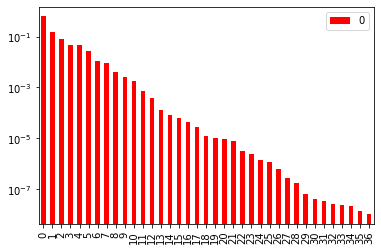

In [14]:
PC_ratio = pca.explained_variance_ratio_
PC_ratio_df = pd.DataFrame(PC_ratio)
PC_ratio_df.plot(kind='bar', logy=True, color='r')

In [15]:
data5 = pd.DataFrame(pcscore)

In [16]:
data5.columns

RangeIndex(start=0, stop=37, step=1)

In [17]:
#설명력이 너무 낮은 (10^(-7) 인 29~36 colunm들도 다 제거
data5 = data5.drop([29,30,31,32,33,34,35,36],axis = 1)

In [18]:
LABEL = data3.LABEL

In [19]:
# 데이터와 라벨을 다시 붙여준다
realdata = pd.merge(data5,LABEL,left_index = True, right_index = True, how = 'left')

In [20]:
realdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,LABEL
0,-0.329978,-0.008471,0.002502,-3.816358,-3.067571,0.042469,-0.374666,-0.009002,-0.035262,-0.046875,0.041571,-0.043759,-0.011712,0.084370,-0.006117,0.029018,0.016878,-0.071487,-0.004051,-0.020391,-0.008956,0.051475,-0.035249,-0.036849,-0.004702,0.010217,0.000783,-0.000117,-0.000054,0
1,-0.371403,0.013009,-0.067209,-3.816955,-3.067675,0.044877,-0.381316,-0.102793,0.072114,-0.095797,-0.260765,0.089675,-0.043029,0.106548,0.022234,0.070950,0.028649,-0.082643,-0.028668,-0.032208,0.008569,-0.015566,-0.015833,-0.024278,0.002612,-0.005419,0.001173,-0.013020,0.002466,0
2,-0.372040,0.005170,-0.070616,-3.817110,-3.067407,0.022014,-0.377152,-0.069992,0.109157,-0.060339,-0.202235,0.066855,-0.028263,0.047259,-0.016128,0.015402,-0.051826,-0.021740,-0.016761,-0.029214,-0.006702,0.038707,-0.014558,-0.017267,0.000895,0.014060,-0.001010,-0.008512,0.007107,0
3,-0.387629,-0.059449,-0.114243,2.326969,-4.378346,0.004968,-0.334032,-0.039041,0.119408,-0.044519,-0.232663,0.089706,-0.020438,0.051268,-0.001245,0.022179,-0.017451,-0.040767,-0.033820,-0.027756,-0.008960,-0.012750,0.005884,-0.026561,-0.004795,0.011920,-0.001994,-0.005570,0.009901,0
4,-0.372539,-0.006311,0.025920,-2.505234,3.076925,0.006162,-0.412217,0.005768,-0.027595,-0.021387,0.005787,-0.043901,-0.002430,0.041013,-0.023550,-0.010737,0.007098,-0.081356,-0.071640,-0.029512,-0.022403,0.037152,-0.012361,-0.020631,-0.000433,-0.000089,0.000819,-0.003734,-0.002841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,-0.386699,-0.064258,-0.037879,3.638584,1.766048,-0.030712,-0.369692,0.010668,0.071573,0.001443,-0.116826,0.034894,-0.004695,0.010851,0.034470,0.021282,0.048595,-0.046410,0.027094,0.015323,0.068698,-0.031309,0.031389,-0.005367,-0.008382,0.035587,0.000956,0.002448,-0.012872,3
36764,-0.391066,-0.057875,-0.039117,3.638687,1.766579,-0.030929,-0.362990,0.055498,0.197450,0.056040,-0.060607,0.002005,0.011010,-0.028999,-0.018944,-0.017345,-0.026991,0.039215,0.019348,0.013817,-0.023888,0.041711,0.015930,0.020742,-0.003650,0.012929,0.000019,-0.001015,-0.003456,3
36765,-0.389637,-0.059136,-0.037748,3.638638,1.766245,-0.022483,-0.367248,0.023605,0.147865,0.016158,-0.122567,0.026665,0.004878,-0.011276,0.025993,0.010271,0.017867,-0.024627,0.019985,0.014966,0.071665,-0.003564,0.023600,-0.001340,-0.006036,0.028624,0.001250,0.000108,-0.006829,3
36766,-0.361112,0.014324,0.019388,-2.505519,3.077155,-0.009217,-0.403538,0.045724,0.220592,0.056429,-0.143990,0.006202,0.001825,0.000551,-0.011243,-0.003847,0.032714,-0.019027,-0.011739,0.012454,-0.015429,-0.020837,0.043532,0.000744,-0.009388,-0.004343,0.001678,0.000977,-0.003041,3


In [21]:
# 데이터 셋을 train,valid,test으로 나눠준다. 비율은 7:2:1

x_train = realdata.sample(frac = 0.7)
x_valid = realdata.drop(x_train.index)
x_test = x_valid.sample(frac=0.333)
x_valid = x_valid.drop(x_test.index)

len(x_train) + len(x_valid) + len(x_test)

36768

In [22]:
y_train = x_train['LABEL']
y_test = x_test['LABEL']
y_valid = x_valid['LABEL']

In [23]:
x_train = x_train.drop(['LABEL'],axis = 1)
x_valid = x_valid.drop(['LABEL'],axis = 1)
x_test = x_test.drop(['LABEL'],axis = 1)

In [24]:
print("x_train.shape:", x_train.shape)
print("x_valid.shape:", x_valid.shape)
print("y_train.shape:", y_train.shape)
print("y_valid.shape:", y_valid.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (25738, 29)
x_valid.shape: (7357, 29)
y_train.shape: (25738,)
y_valid.shape: (7357,)
x_test.shape: (3673, 29)
y_test.shape: (3673,)


In [25]:
x_train_exp = np.expand_dims(x_train, -1)  
x_valid_exp = np.expand_dims(x_valid, -1)  
x_test_exp = np.expand_dims(x_test, -1)

print("x_train_exp의 형태:", x_train_exp.shape)
print("x_valid_exp의 형태:", x_valid_exp.shape)
print("x_test_exp의 형태:", x_test_exp.shape)

x_train_exp의 형태: (25738, 29, 1)
x_valid_exp의 형태: (7357, 29, 1)
x_test_exp의 형태: (3673, 29, 1)


In [26]:
#정상을 1로, 비정상을 0으로 바꿔줌

y_train[y_train == 0] = 1
y_valid[y_valid == 0] = 1
y_test[y_test == 0] = 1

y_train[y_train == 3] = 0
y_valid[y_valid == 3] = 0
y_test[y_test == 3] = 0

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def draw_confusion_matrix(model, xt, yt, model_name):
    Y_pred = model.predict(xt)
    if model_name in ["cnn", "rnn"]:
        y_pred = np.argmax(Y_pred, axis=1)
    else: y_pred = Y_pred
    plt.figure(figsize=(3,3))
    cm = confusion_matrix(yt, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['False', 'True'], rotation=45)
    plt.yticks(tick_marks, ['False', 'True'])
    thresh = cm.max()/1.2
    normalize = False
    fmt = '.2f' if normalize else 'd'
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt), 
                 horizontalalignment="center", 
                 color="white" if cm[i,j] > thresh else "black", 
                 fontsize=12)
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.savefig(save_path + '{}_cm.png'.format(model_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()
    print(classification_report(yt, y_pred))

In [28]:
from sklearn.metrics import roc_curve, auc

def draw_roc(model,xt, yt, model_name):
    Y_pred = model.predict(xt)
    if model_name in ["cnn", "rnn"]:
        y_pred = np.argmax(Y_pred, axis=1)
    else: y_pred = Y_pred
    fpr, tpr, thr = roc_curve(yt, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic {};'.format(model_name))
    plt.legend(loc="lower right")
    plt.ion()
    plt.tight_layout()
    plt.savefig(save_path + '{}_roc.png'.format(model_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()

In [29]:
def plot_loss_graph(history, pic_name):
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history["val_loss"])
    plt.title("Training & Validation Loss")
    plt.ylabel("loss", fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "validation"], loc="best")
    plt.tight_layout()
    plt.savefig(save_path + '{}.png'.format(pic_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()
    plt.close()

In [30]:
def plot_prediction_graph(history, pic_name):
    plt.figure()
    plt.plot(history.history["sparse_categorical_accuracy"])
    plt.plot(history.history["val_" + "sparse_categorical_accuracy"])
    plt.title("model " + "Prediction Accuracy")
    plt.ylabel("sparse_categorical_accuracy", fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "validation"], loc="best")
    plt.tight_layout()
    plt.savefig(save_path + '{}.png'.format(pic_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()
    plt.close()

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense

def make_rnn_model():
  model=Sequential()
  model.add(LSTM(units=256, return_sequences=True))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model. add(Dense(2, activation='softmax'))
  return model

rnn_model=make_rnn_model()

In [35]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

save_path='/content/drive/MyDrive/데이터'

epochs=100
batch_size=64
rnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['sparse_categorical_accuracy']
                 )
callbacks=[ModelCheckpoint(save_path+'rnn_best_model.h5',
                           monitor='val_loss',
                           save_best_only=True),
          ReduceLROnPlateau(
          monitor='val_loss', factor=0.5, patience=20, min_lr=0.0001),
          EarlyStopping(monitor='val_loss', patience=10, verbose=1)
          ]
history_rnn=rnn_model.fit(
x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1,
)

Epoch 1/100
403/403 [==============================] - 57s 136ms/step - loss: 0.1737 - sparse_categorical_accuracy: 0.9361 - val_loss: 0.0796 - val_sparse_categorical_accuracy: 0.9746
Epoch 2/100
403/403 [==============================] - 54s 133ms/step - loss: 0.0505 - sparse_categorical_accuracy: 0.9822 - val_loss: 0.0582 - val_sparse_categorical_accuracy: 0.9834
Epoch 3/100
403/403 [==============================] - 54s 134ms/step - loss: 0.0329 - sparse_categorical_accuracy: 0.9878 - val_loss: 0.0455 - val_sparse_categorical_accuracy: 0.9833
Epoch 4/100
403/403 [==============================] - 55s 135ms/step - loss: 0.0284 - sparse_categorical_accuracy: 0.9891 - val_loss: 0.0413 - val_sparse_categorical_accuracy: 0.9865
Epoch 5/100
403/403 [==============================] - 55s 136ms/step - loss: 0.0273 - sparse_categorical_accuracy: 0.9900 - val_loss: 0.0349 - val_sparse_categorical_accuracy: 0.9902
Epoch 6/100
403/403 [==============================] - 55s 137ms/step - loss: 0.

In [38]:
import tensorflow as tf
rnn_model = tf.keras.models.load_model(save_path + "rnn_best_model.h5")
scores = rnn_model.evaluate(x_test_exp, y_test)

print("\n""Test accuracy", scores[1])
print("\n""Test loss", scores[0])
print("%s: %.2f%%" % (rnn_model.metrics_names[1], scores[1]*100))

115/115 [==============================] - 4s 30ms/step - loss: 0.0120 - sparse_categorical_accuracy: 0.9948

Test accuracy 0.9948270916938782

Test loss 0.0120468745008111
sparse_categorical_accuracy: 99.48%


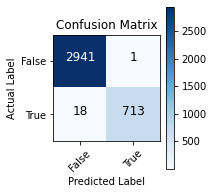

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2942
           1       1.00      0.98      0.99       731

    accuracy                           0.99      3673
   macro avg       1.00      0.99      0.99      3673
weighted avg       0.99      0.99      0.99      3673



In [40]:
import matplotlib.pyplot as plt
draw_confusion_matrix(rnn_model, x_test_exp, y_test, "rnn")

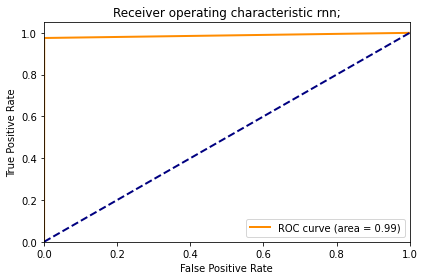

In [41]:
draw_roc(rnn_model, x_test_exp, y_test, "rnn")

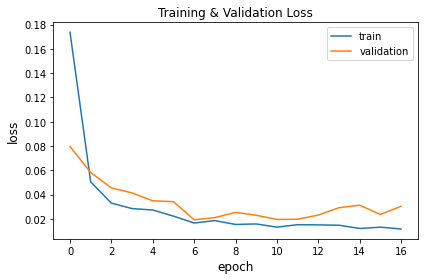

In [42]:
plot_loss_graph(history_rnn, "rnn")

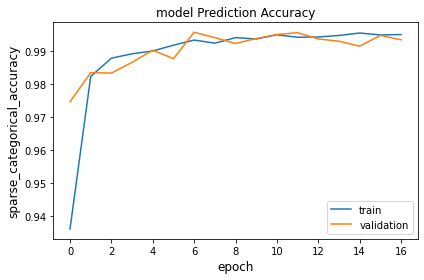

In [43]:
plot_prediction_graph(history_rnn, "rnn")

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense
from keras.layers import GRU

def make_rnn_model():
  model=Sequential()
  model.add(LSTM(units=512, return_sequences=True))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model. add(Dense(2, activation='softmax'))
  return model

rnn_model=make_rnn_model()

In [56]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

save_path='/content/drive/MyDrive/데이터'

epochs=100
batch_size=64
rnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['sparse_categorical_accuracy']
                 )
callbacks=[ModelCheckpoint(save_path+'rnn_best_model.h5',
                           monitor='val_loss',
                           save_best_only=True),
          ReduceLROnPlateau(
          monitor='val_loss', factor=0.5, patience=20, min_lr=0.0001),
          EarlyStopping(monitor='val_loss', patience=10, verbose=1)
          ]
history_rnn=rnn_model.fit(
x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1
)

Epoch 1/100
403/403 [==============================] - 265s 489ms/step - loss: 0.1588 - sparse_categorical_accuracy: 0.9389 - val_loss: 0.0883 - val_sparse_categorical_accuracy: 0.9724
Epoch 2/100
403/403 [==============================] - 197s 488ms/step - loss: 0.0428 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.0437 - val_sparse_categorical_accuracy: 0.9876
Epoch 3/100
403/403 [==============================] - 197s 490ms/step - loss: 0.0378 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.0861 - val_sparse_categorical_accuracy: 0.9687
Epoch 4/100
403/403 [==============================] - 199s 495ms/step - loss: 0.0251 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.0271 - val_sparse_categorical_accuracy: 0.9914
Epoch 5/100
403/403 [==============================] - 196s 486ms/step - loss: 0.0246 - sparse_categorical_accuracy: 0.9905 - val_loss: 0.0401 - val_sparse_categorical_accuracy: 0.9910
Epoch 6/100
403/403 [==============================] - 196s 486ms/step - lo

KeyboardInterrupt: ignored

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [58]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [59]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [62]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(x_train_exp.shape)
embedding_layer = TokenAndPositionEmbedding(30, 36768, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [63]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train_exp, y_train, batch_size=32, epochs=20, validation_data=(x_valid_exp, y_valid)
)

Epoch 1/20


ValueError: ignored

transformer 시도하다가 실패했습니다.